In [14]:
import pandas as pd
df = pd.read_csv("datathon data/stock_data.csv")
df.columns

Index(['Date', 'Ticker_Symbol', 'Close_lag_1', 'Close_logreturn', 'Year',
       'Type', 'Type_Clean', 'Unit', 'Geography', 'Gas_Price', 'Month',
       'Refining', 'Distribution_and_Marketing', 'Taxes', 'Crude_Oil',
       'Brent_Price', 'Gas_Price_logreturn', 'Gas_Price_pct',
       'Brent_Price_logreturn', 'Brent_Price_pct', 'Refining_logreturn',
       'Refining_pct', 'Taxes_logreturn', 'Taxes_pct',
       'Distribution_and_Marketing_logreturn',
       'Distribution_and_Marketing_pct', 'Crude_Oil_logreturn',
       'Crude_Oil_pct', 'Gas_Price_lag_1'],
      dtype='object')

### Train XGBoost and Random Forest for each stock

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assume `df` is your full DataFrame with a 'Ticker_Symbol' column
label_col = 'Close_logreturn'
feature_cols = [
    col for col in df.columns
    if (
        col == 'Close_lag_1'
        or col == 'Stock_Number'
        or '_logreturn' in col
    )
    and col != label_col
]

print(feature_cols)

# Prepare a dict to hold per‐ticker results
results = {}

for symbol in df['Ticker_Symbol'].unique():
    # print(f"Processing {symbol}...")
    
    # 1) Subset the DataFrame to this ticker
    sub = df[df['Ticker_Symbol'] == symbol].copy()
    
    # 2) Extract X and y
    X = sub[feature_cols]
    y = sub[label_col]

    # 3) Standardize
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        index=X.index,
        columns=X.columns
    )
    y_scaled = pd.Series(
        scaler.fit_transform(y.values.reshape(-1, 1)).ravel(),
        index=y.index,
        name=y.name
    )

    # print(X)
    # print(y)
    
    # 4) Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42
    )
    
    # 5) Fit model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # 6) Predict & evaluate
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    # 7) Feature importances
    feat_imp = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # 8) Store results
    results[symbol] = {
        'model': model,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'feature_importances': feat_imp
    }

print(f"Processing {symbol}...")

# Accessing results for e.g. ticker "HAL":
print("HAL train MSE:", results['HAL']['mse_train'])
print("HAL test MSE:",  results['HAL']['mse_test'])
print("HAL top features:\n", results['HAL']['feature_importances'].head())


['Close_lag_1', 'Gas_Price_logreturn', 'Brent_Price_logreturn', 'Refining_logreturn', 'Taxes_logreturn', 'Distribution_and_Marketing_logreturn', 'Crude_Oil_logreturn']
Processing SPY...
HAL train MSE: 0.005361292484141061
HAL test MSE: 1.1560005676426819
HAL top features:
                                 feature  importance
4                       Taxes_logreturn    0.182865
2                 Brent_Price_logreturn    0.177427
6                   Crude_Oil_logreturn    0.168130
5  Distribution_and_Marketing_logreturn    0.142589
3                    Refining_logreturn    0.134166


HAL train MSE: 0.005361292484141061
HAL test MSE: 1.1560005676426819


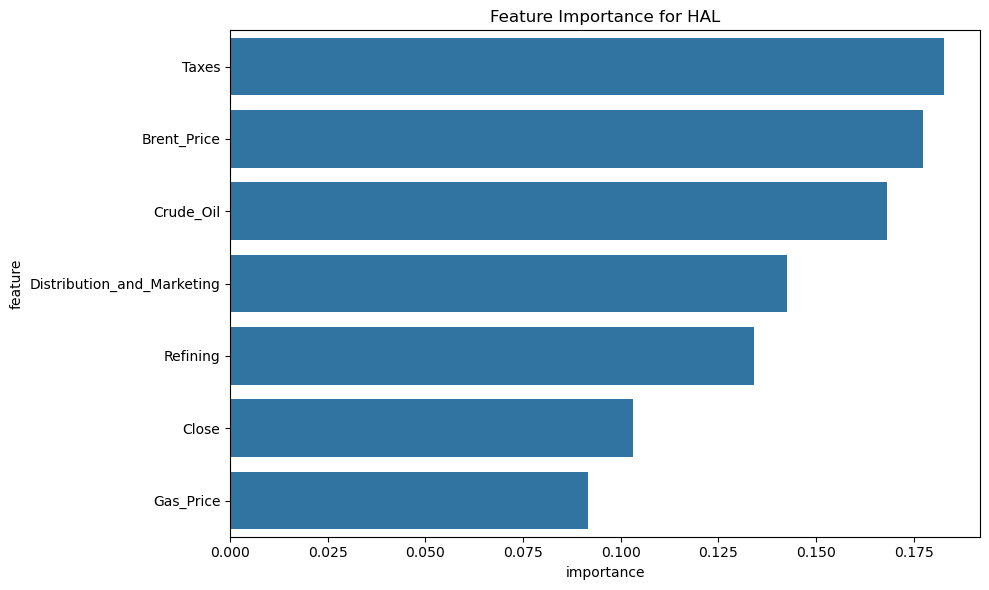

FANG train MSE: 0.00037410157686594423
FANG test MSE: 1.5724136040295413


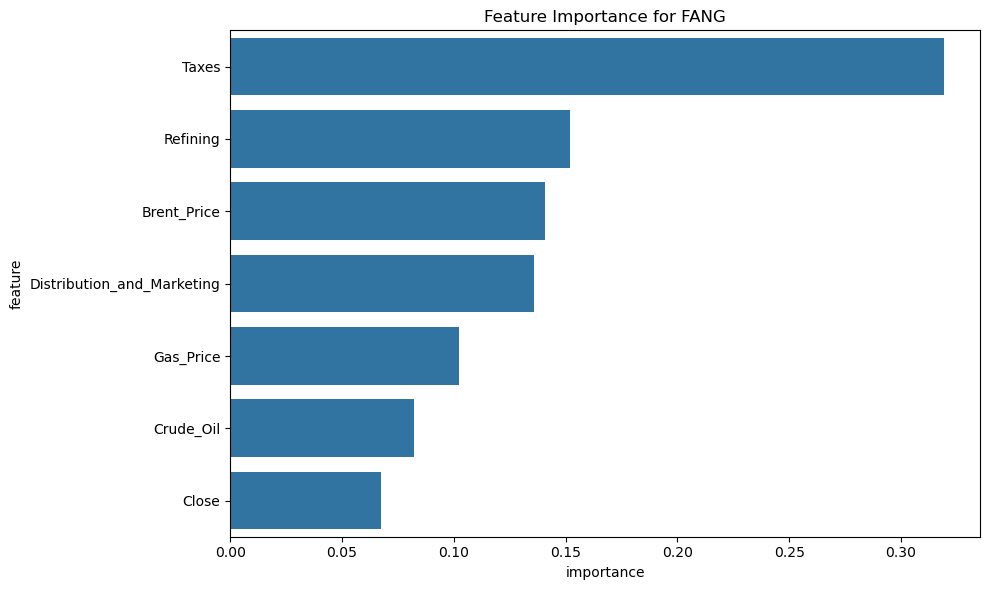

E train MSE: 0.001533192880712307
E test MSE: 1.7449397329887795


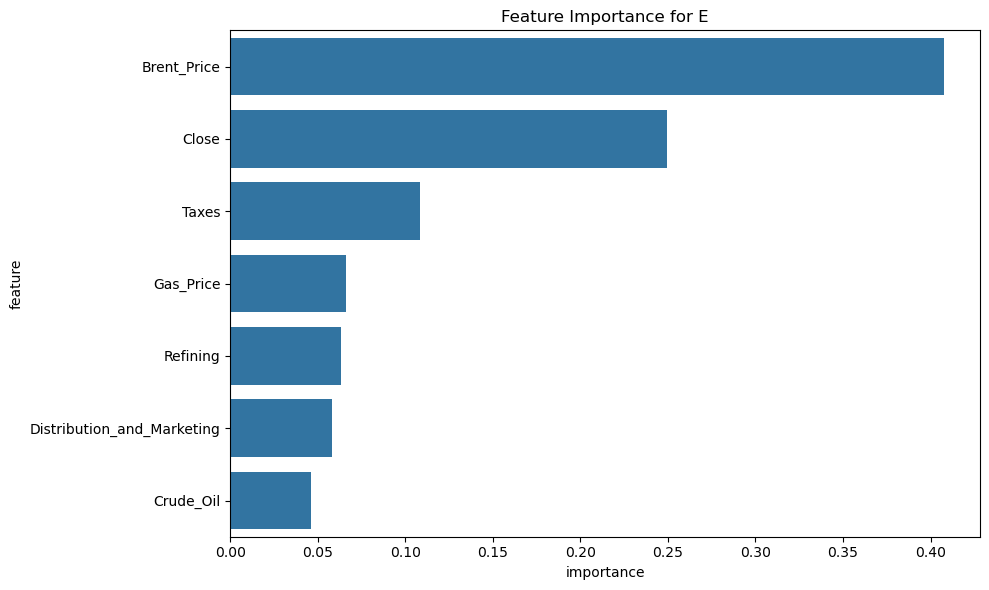

EXC train MSE: 0.003436988175980991
EXC test MSE: 1.3051222244149105


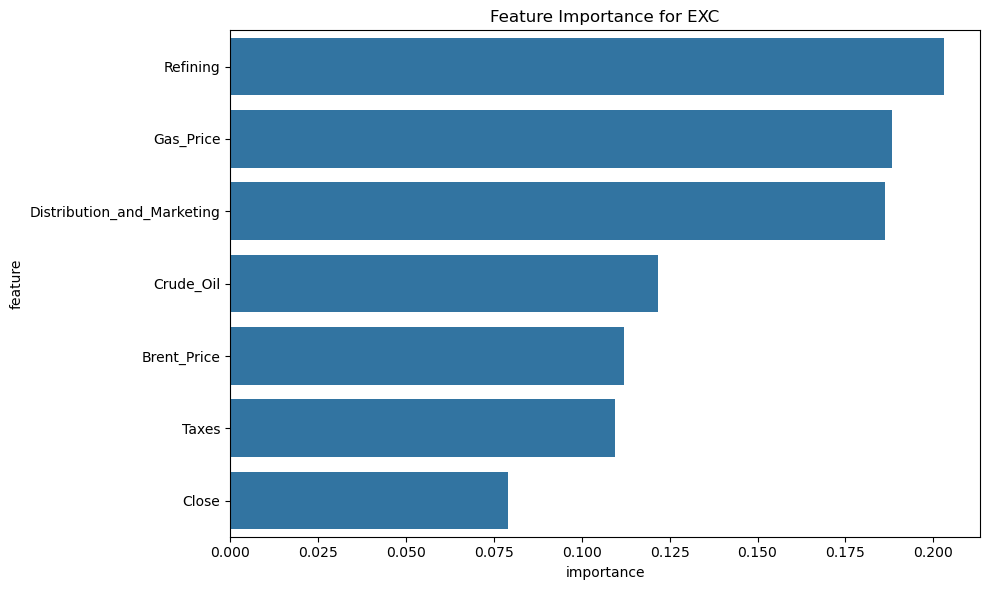

HES train MSE: 0.0049113076522262124
HES test MSE: 1.2813910152469756


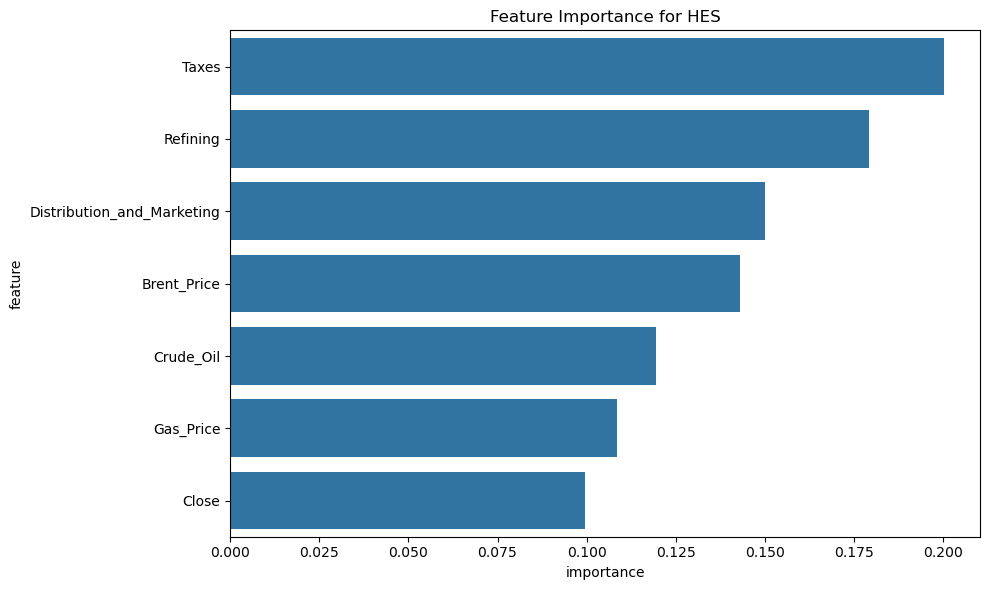

BKR train MSE: 8.008448452438531e-06
BKR test MSE: 1.6811531146433674


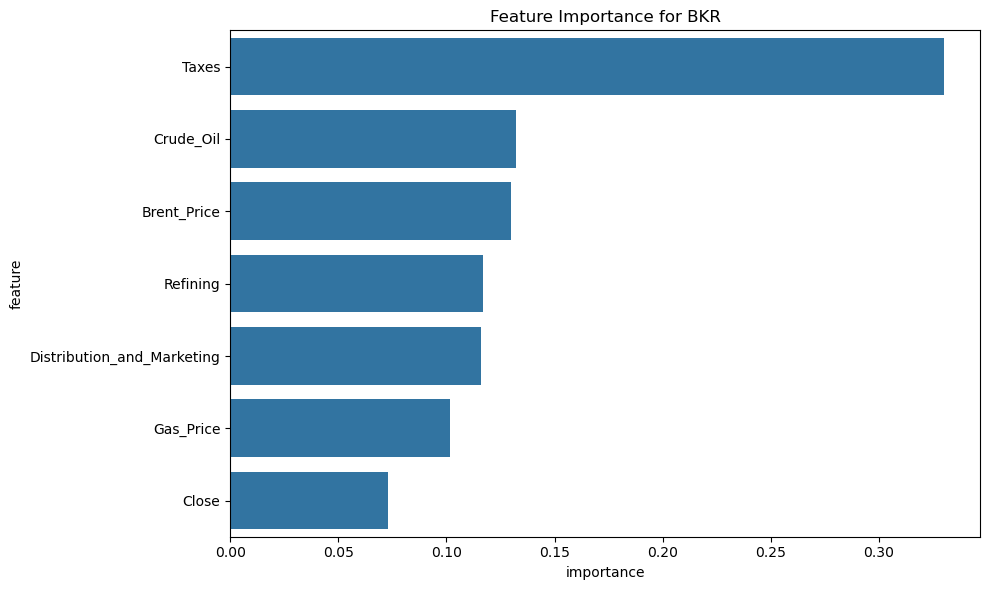

BPT train MSE: 0.004279390275152701
BPT test MSE: 1.321593843344838


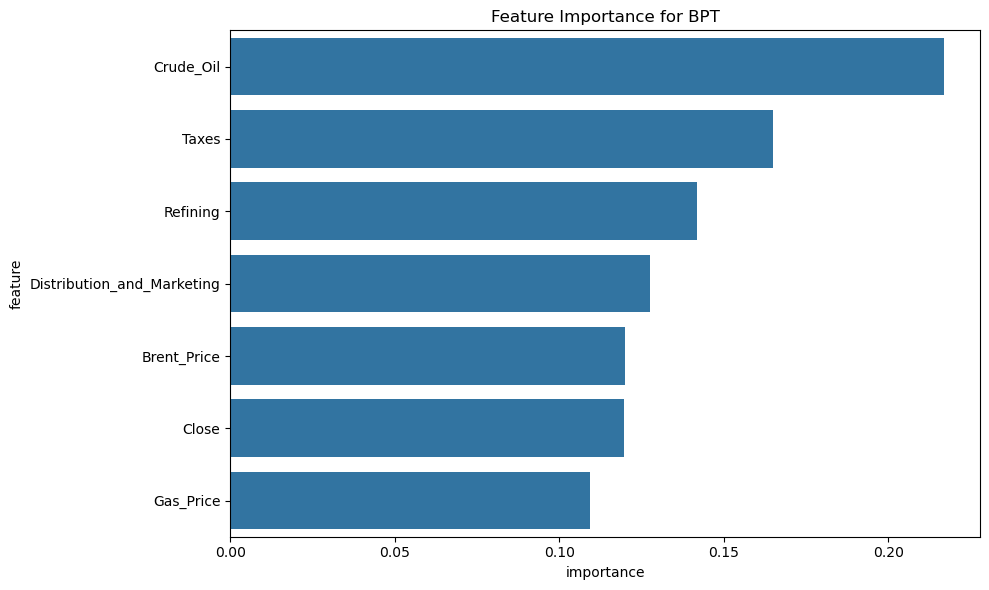

VLO train MSE: 0.00569439276603253
VLO test MSE: 1.3224507280843238


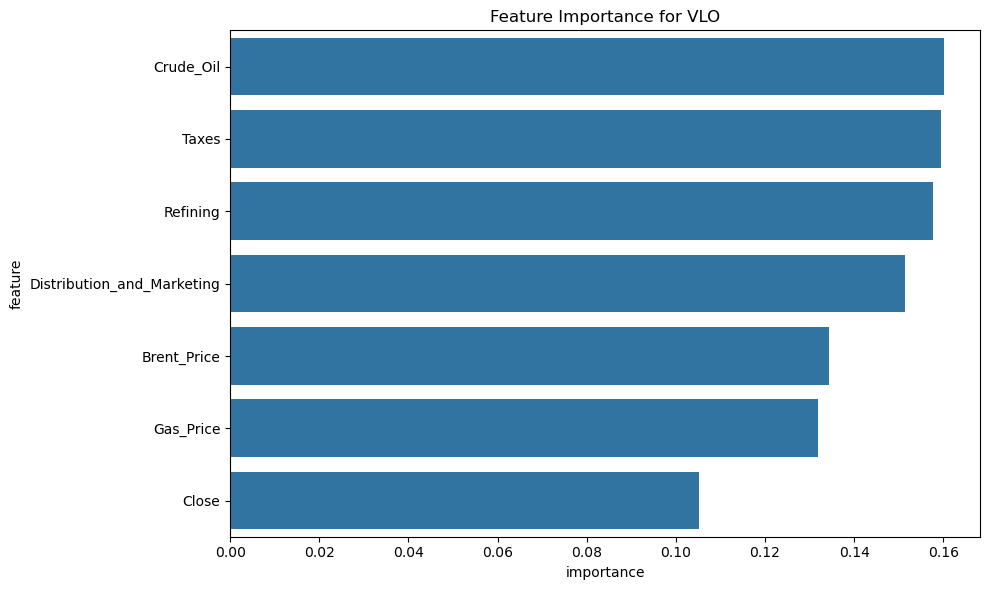

CVX train MSE: 0.0035879470868504875
CVX test MSE: 1.2505711677877853


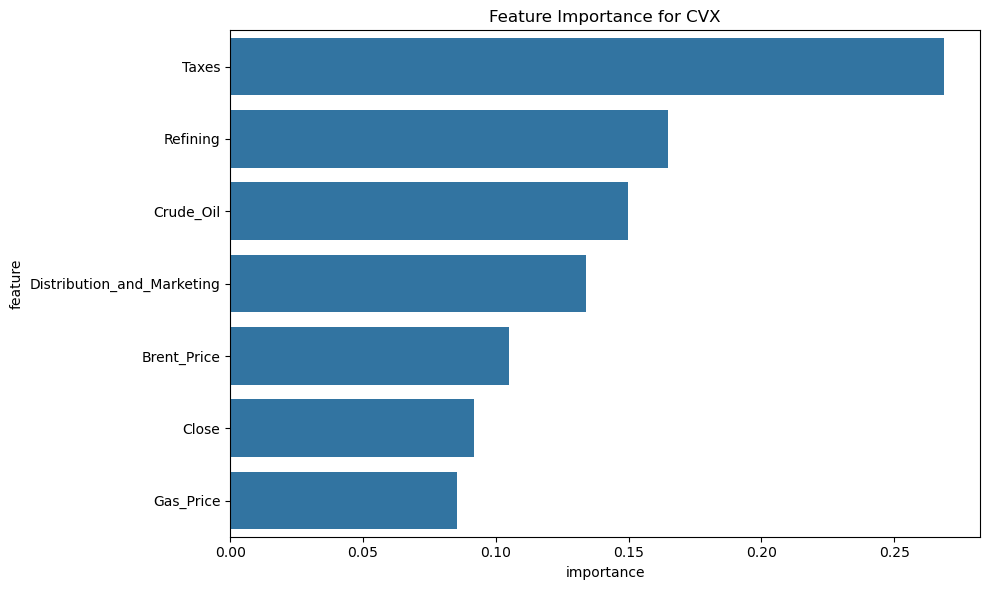

OXY train MSE: 0.004878131107109742
OXY test MSE: 1.380457783469558


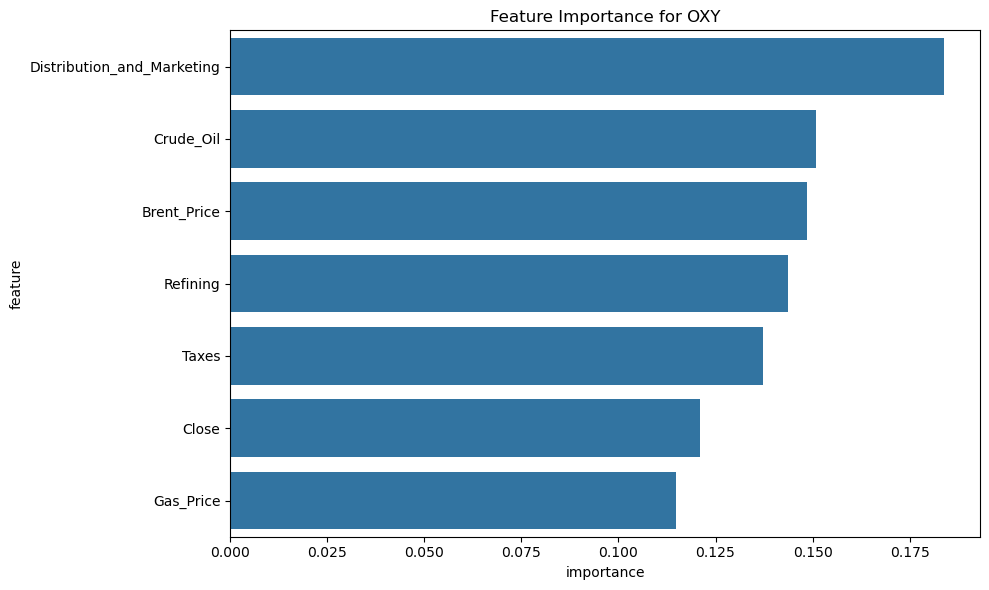

KMI train MSE: 0.00037608913264971854
KMI test MSE: 1.3061404755076802


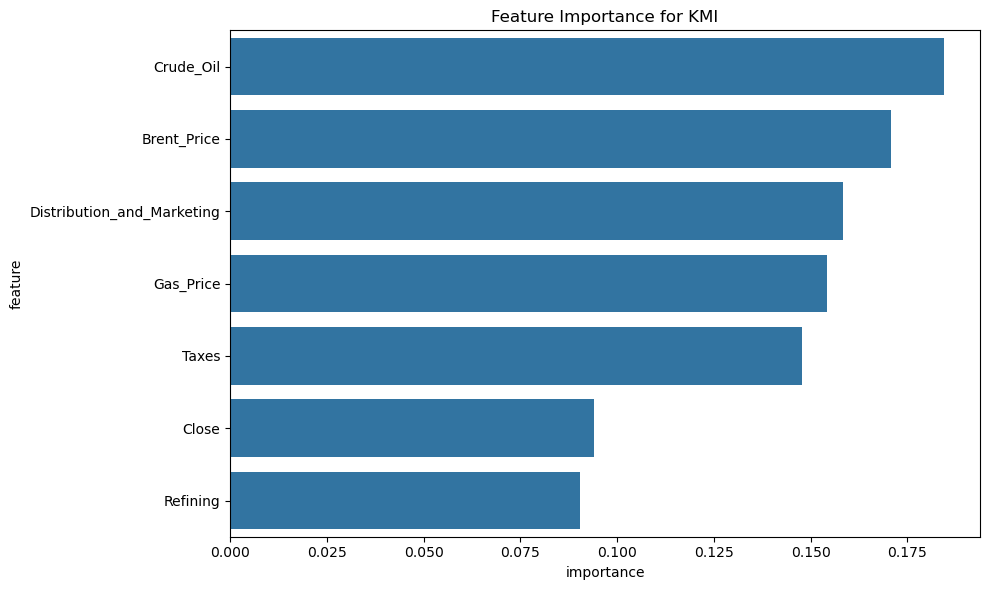

PSX train MSE: 0.0002640511122197078
PSX test MSE: 1.5928330084397564


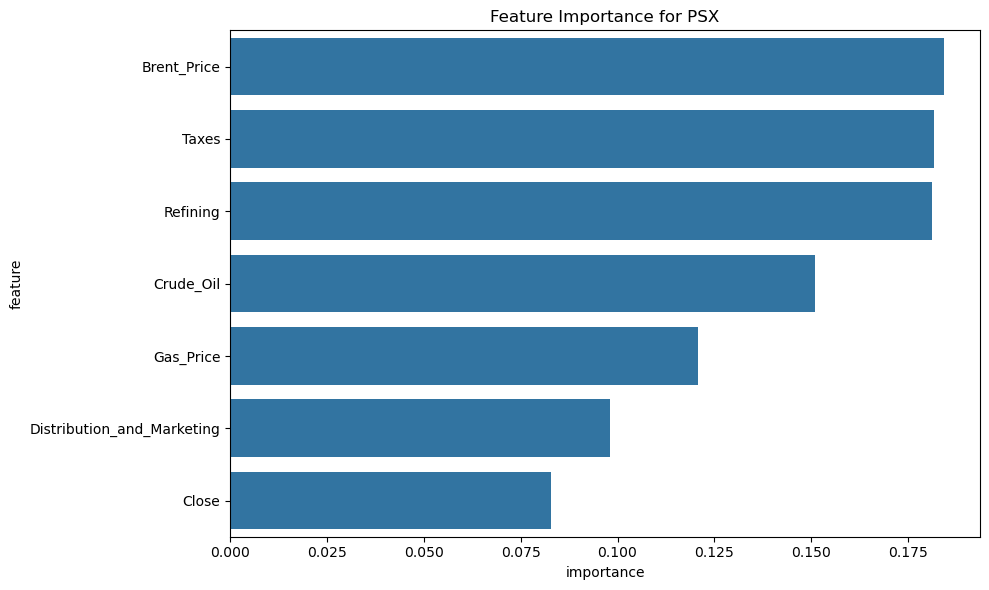

NOV train MSE: 0.005062138740902266
NOV test MSE: 1.3759902566017932


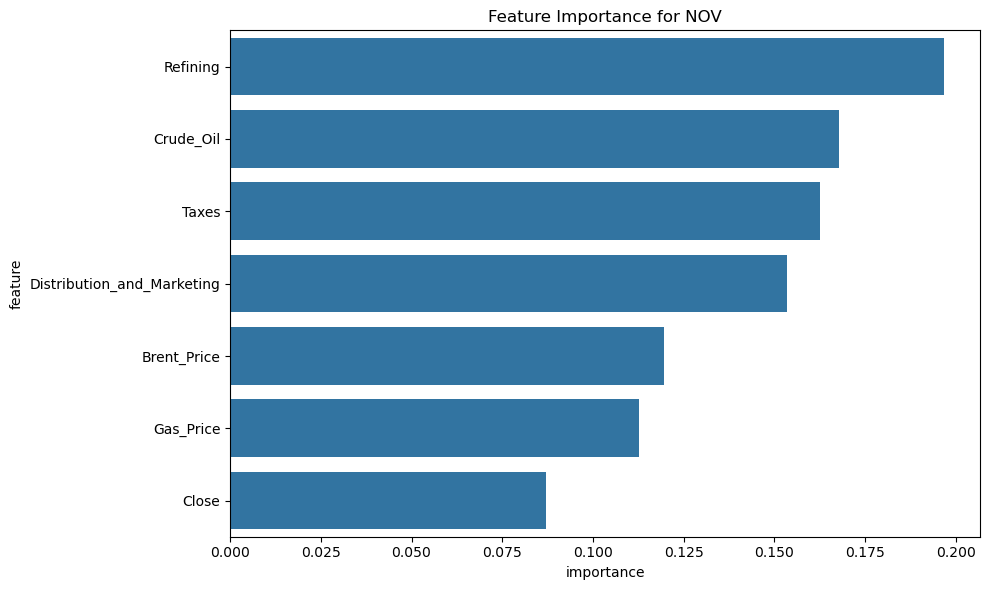

CHK train MSE: 9.912626699236421e-07
CHK test MSE: 1.334972416592244


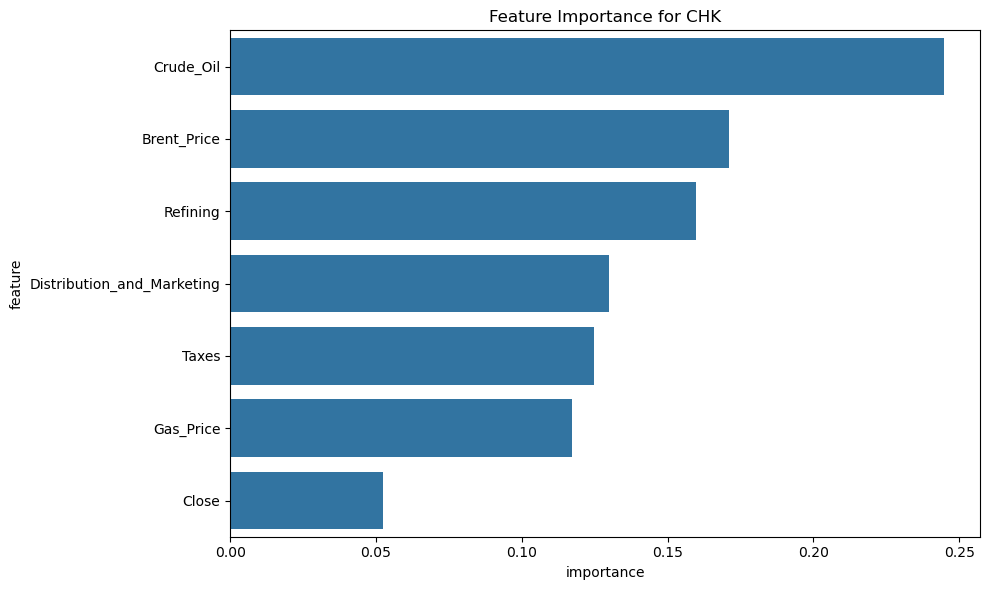

MPC train MSE: 0.000425071277166473
MPC test MSE: 1.4242234588813594


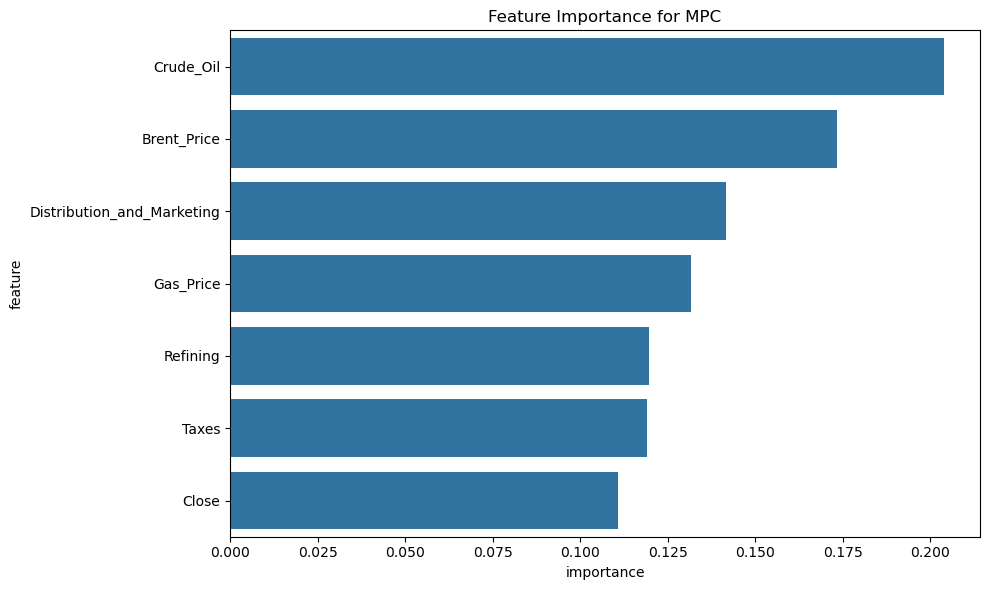

DVN train MSE: 0.0031511317126225826
DVN test MSE: 0.8728486296737211


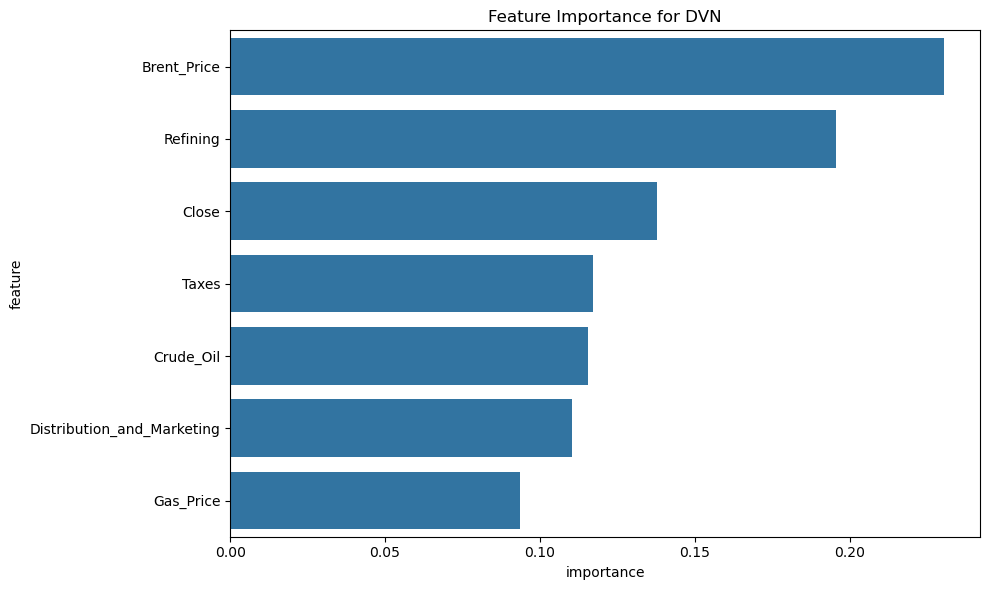

COP train MSE: 0.0049091163852343035
COP test MSE: 1.3084845915118664


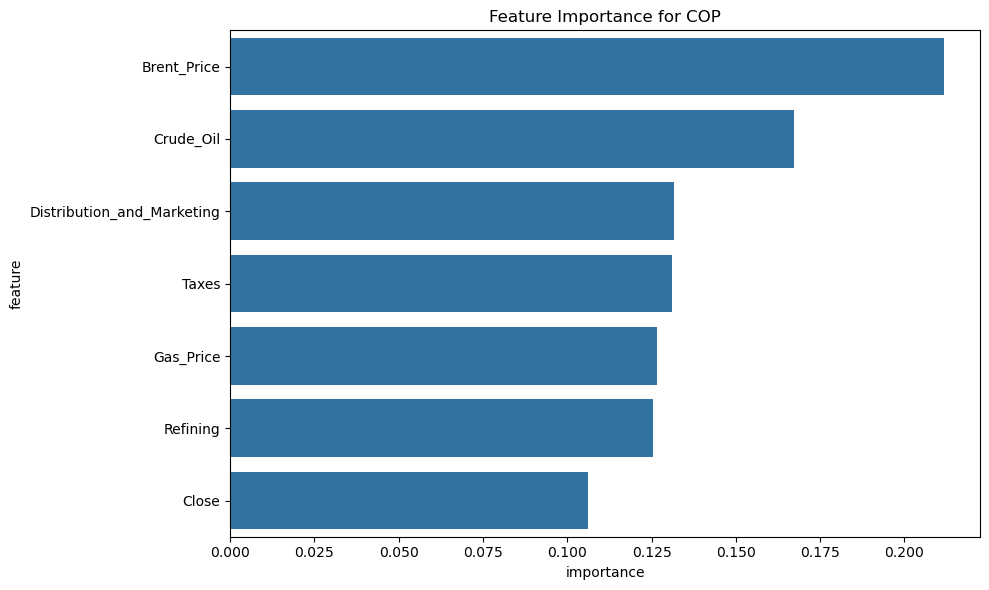

EPD train MSE: 0.005473433153439808
EPD test MSE: 1.1711707296864002


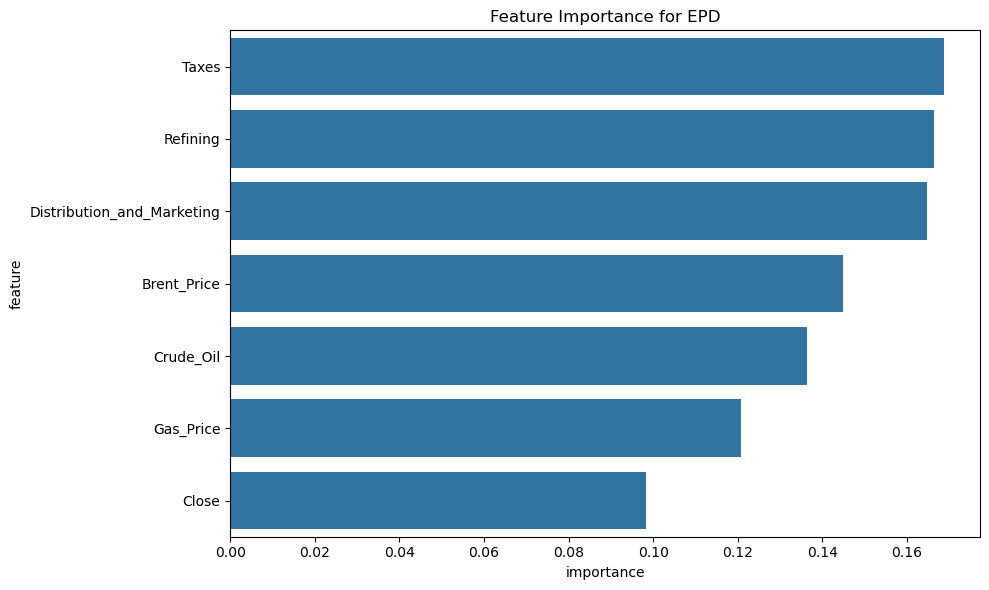

BP train MSE: 0.004964773508640945
BP test MSE: 1.2316006094810084


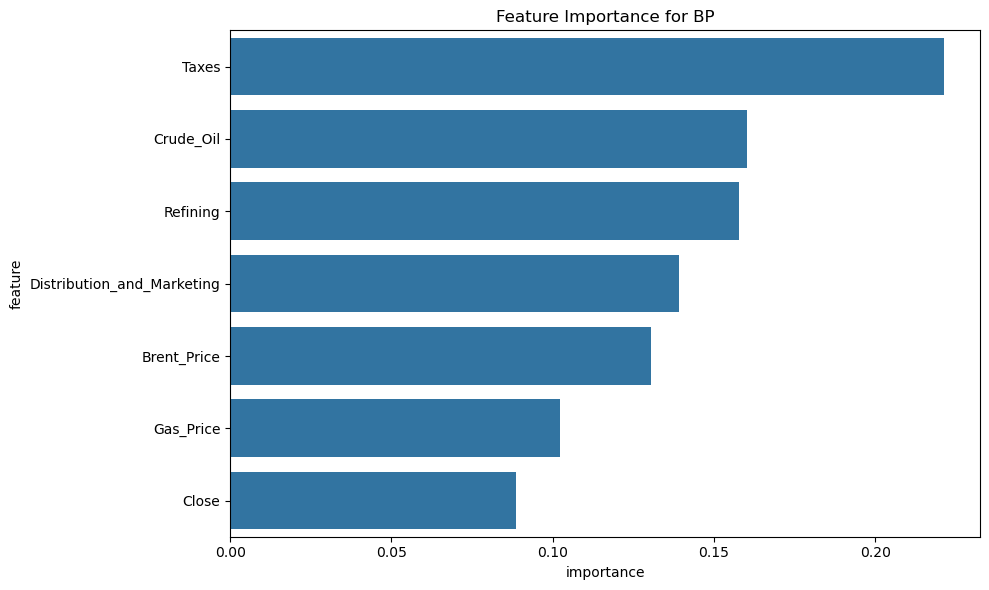

XOM train MSE: 0.005364468067599622
XOM test MSE: 1.3516939734790805


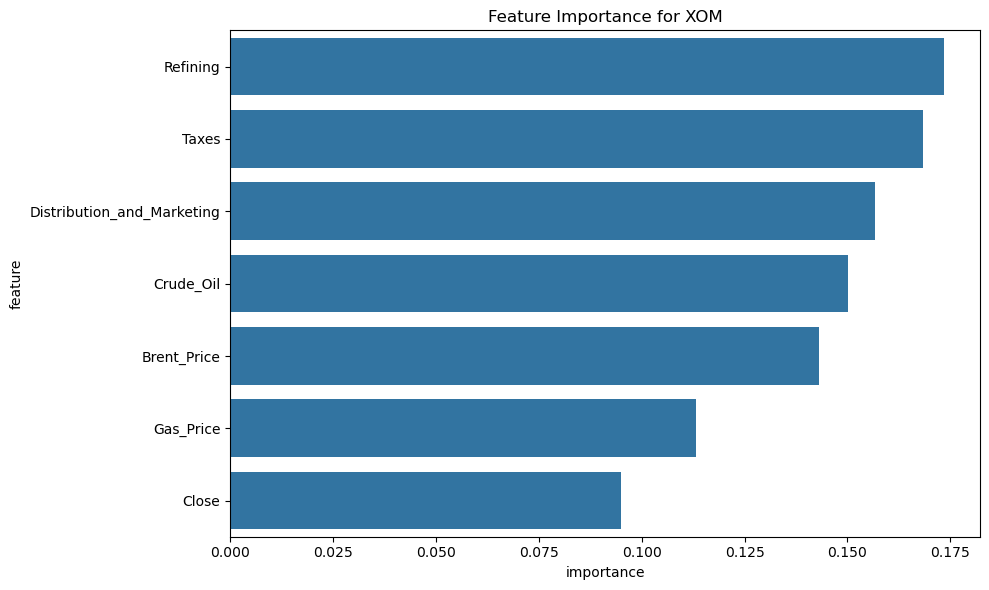

EOG train MSE: 0.003697148930616688
EOG test MSE: 2.945832350723622


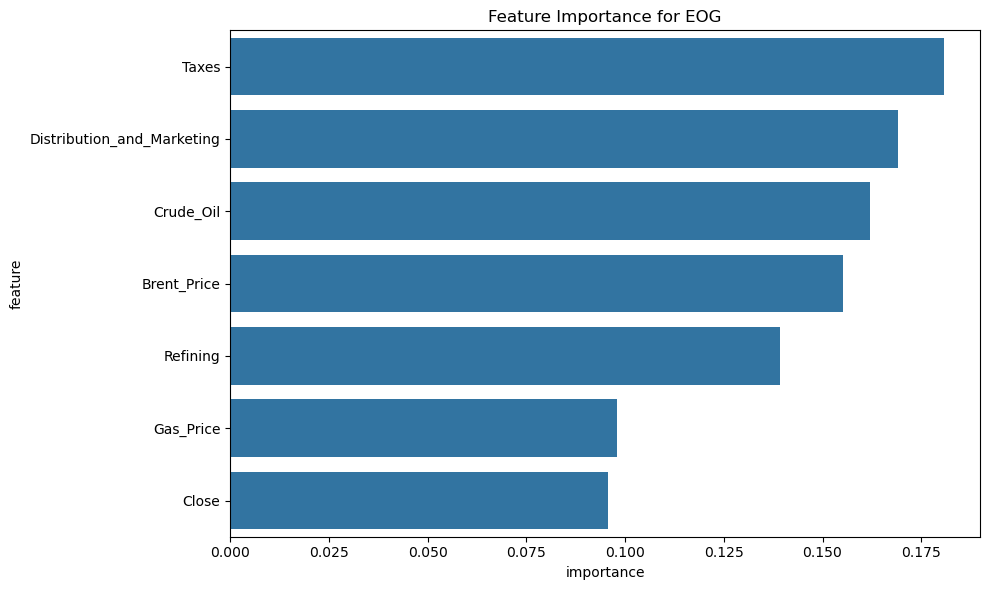

CEO train MSE: 0.004375969022249148
CEO test MSE: 1.2914374045273733


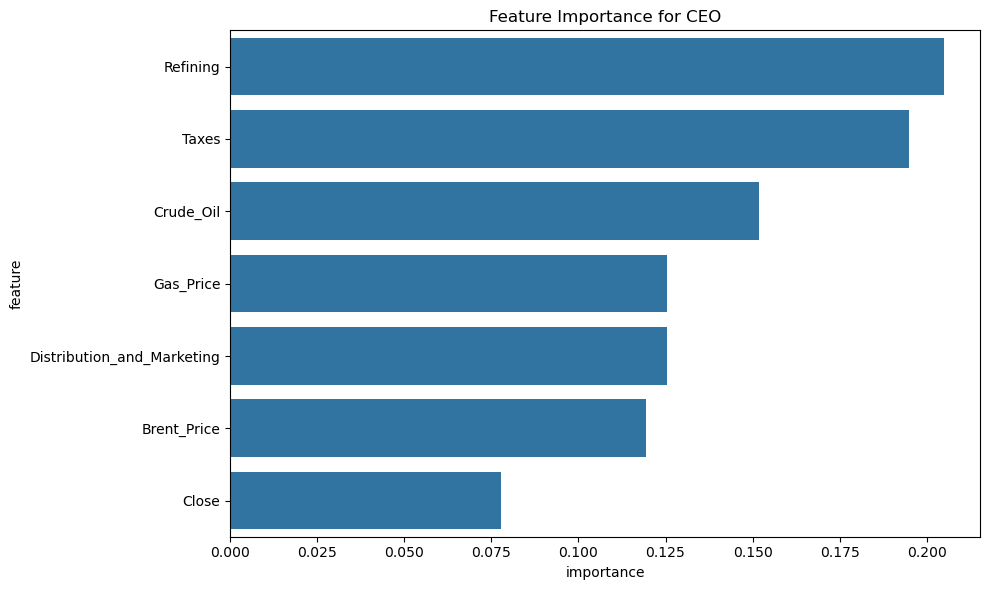

SLB train MSE: 0.004630634603085432
SLB test MSE: 1.4119370356976026


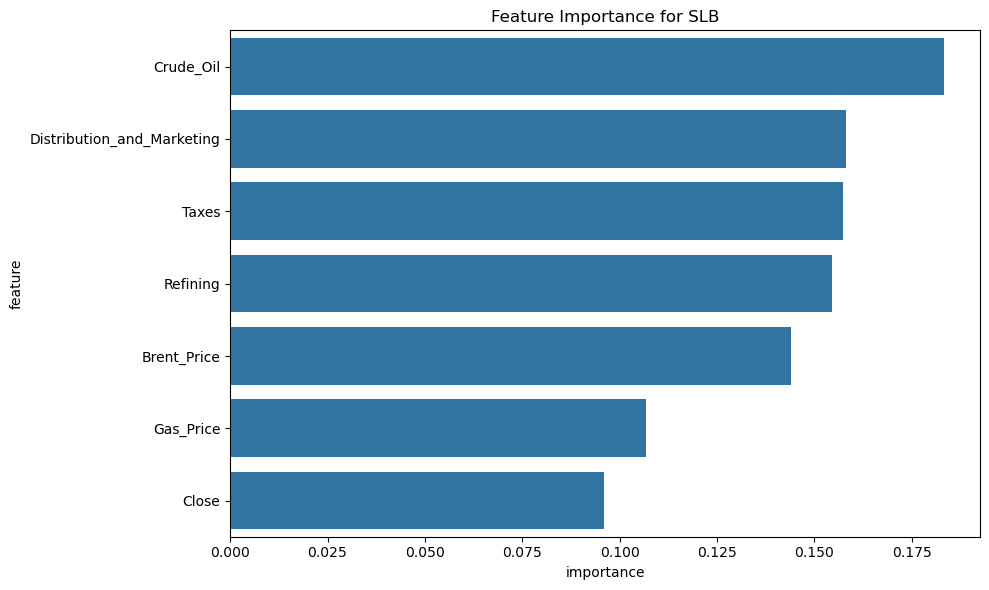

WMB train MSE: 0.0035996698690162754
WMB test MSE: 1.9824676634932636


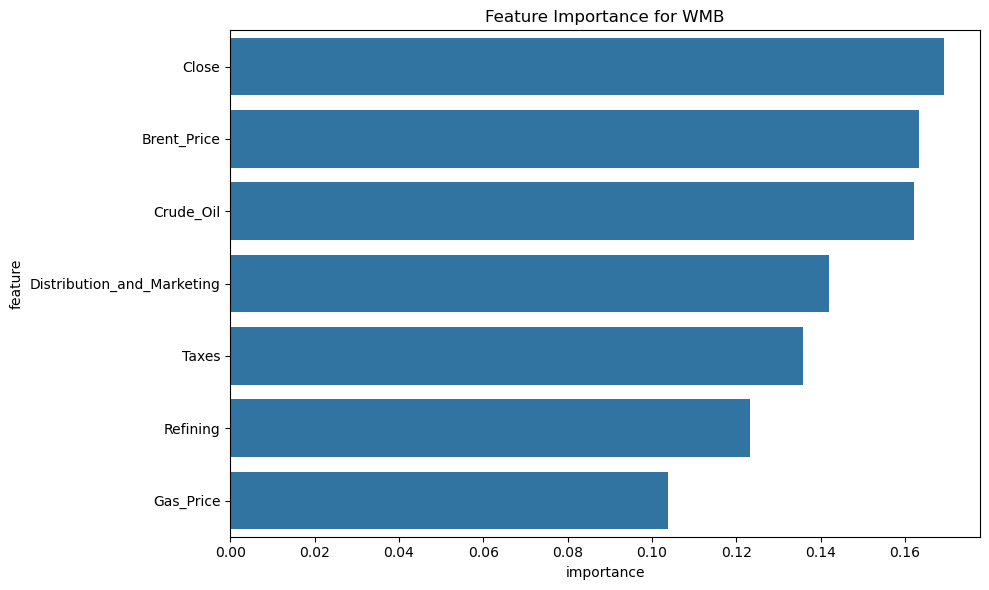

ONEQ train MSE: 0.00350749493845763
ONEQ test MSE: 1.1679960141992611


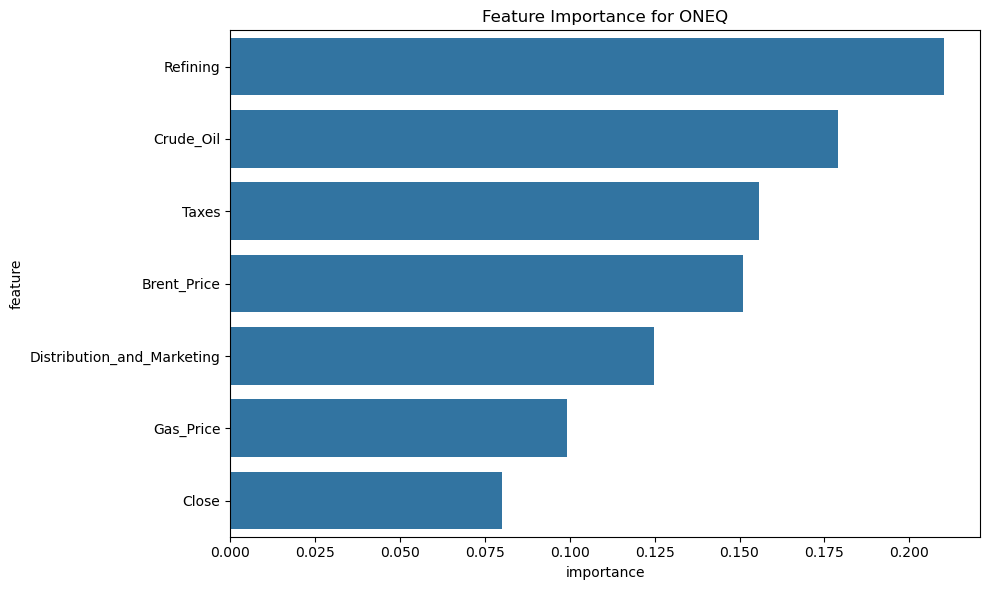

DIA train MSE: 0.004899412097186416
DIA test MSE: 1.4543695836633799


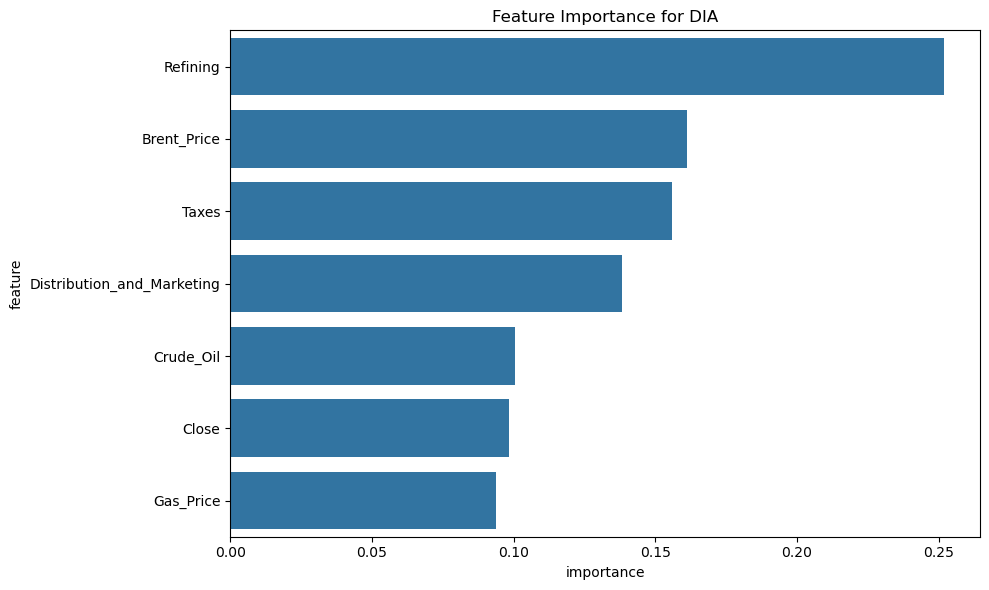

VOO train MSE: 0.0009009328341709954
VOO test MSE: 1.0675289036430138


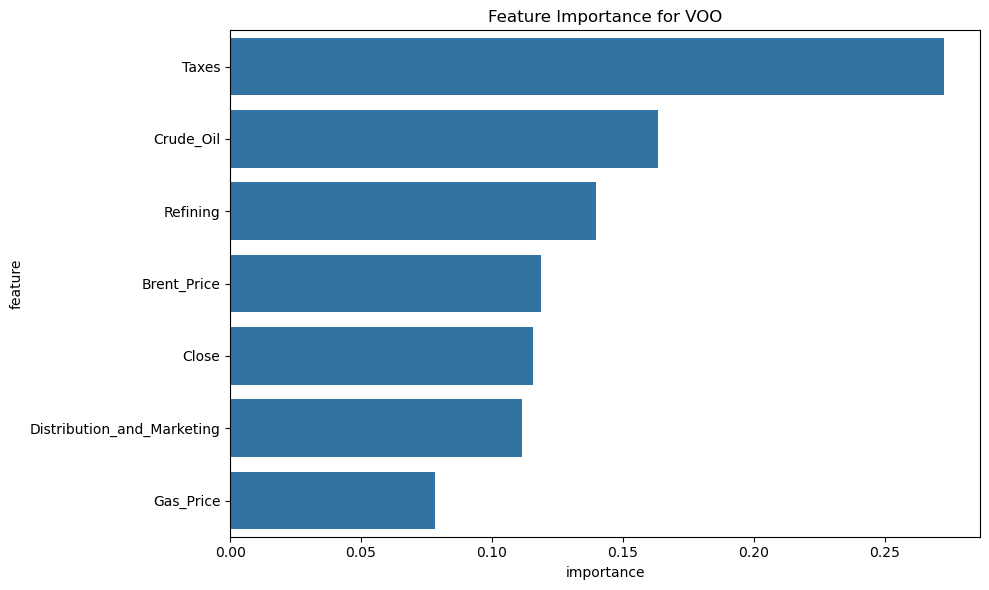

SPY train MSE: 0.005628223817455484
SPY test MSE: 1.3757818336065257


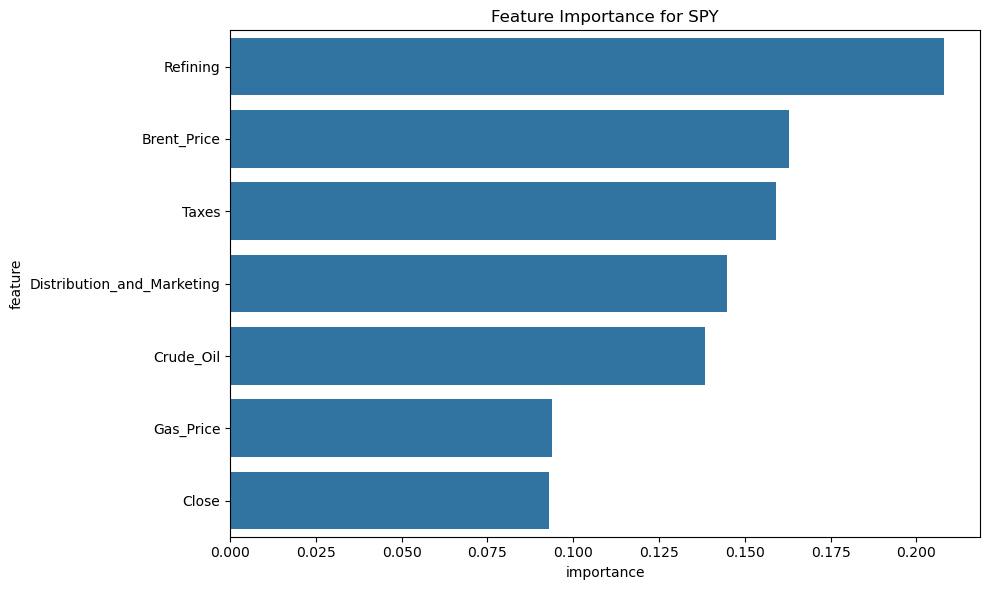

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
for symbol in df['Ticker_Symbol'].unique():
    print(f"{symbol} train MSE:", results[symbol]['mse_train'])
    print(f"{symbol} test MSE:",  results[symbol]['mse_test'])
    
    feat_importance = results[symbol]['feature_importances']
    feat_importance['feature'] = feat_importance['feature'].str.replace('_logreturn', '')
    feat_importance['feature'] = feat_importance['feature'].str.replace('Close_lag_1', 'Close')
    feat_importance['feature'] = feat_importance['feature'].str.replace('Stock_Number', 'Stock Number')
    feat_importance['feature'] = feat_importance['feature'].str.replace('logreturn', 'Log Return')

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feat_importance)
    plt.title(f"Feature Importance for {symbol}")
    plt.tight_layout()
    plt.show()

In [17]:
# 1. Gather all unique features
features = results[next(iter(results))]['feature_importances']['feature'].tolist()

# 2. Initialize an empty DataFrame
imp_matrix = pd.DataFrame(
    index=results.keys(),
    columns=features,
    data=0.0
)

# 3. Fill in importances
for symbol, res in results.items():
    fi = res['feature_importances']
    imp_matrix.loc[symbol, fi['feature']] = fi['importance'].values

imp_matrix

,Taxes,Brent_Price,Crude_Oil,Distribution_and_Marketing,Refining,Close,Gas_Price
HAL,0.182865,0.177427,0.168130,0.142589,0.134166,0.103065,0.091757
FANG,0.319329,0.140697,0.082138,0.135973,0.151949,0.067629,0.102285
E,0.108661,0.407845,0.045943,0.058423,0.063328,0.249673,0.066128
EXC,0.109476,0.112071,0.121610,0.186337,0.203111,0.079059,0.188336
HES,0.200313,0.143010,0.119577,0.150048,0.179267,0.099407,0.108378
BKR,0.330216,0.130024,0.132274,0.116110,0.116849,0.072803,0.101723
BPT,0.165029,0.119918,0.216991,0.127422,0.141821,0.119526,0.109292
VLO,0.159396,0.134328,0.160219,0.151358,0.157764,0.105112,0.131823
CVX,0.268865,0.104951,0.149720,0.134080,0.164917,0.091891,0.085577
OXY,0.137136,0.148452,0.150940,0.183924,0.143555,0.121061,0.114934


In [18]:
import pandas as pd

types_df = pd.read_excel("datathon data/stock_descriptions_class.xlsx")

# Save as CSV
types_df.to_csv("datathon data/stock_descriptions_class.csv", index=False)
types_df.rename(columns={'Symbol': 'Ticker_Symbol'}, inplace=True)
types_df

,Ticker_Symbol,AssetType,Name,Description,Sector,Industry,chain
0,BKR,Common Stock,Baker Hughes Company,Baker Hughes Company provides a portfolio of t...,ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES,upstream*
1,BP,Common Stock,BP PLC ADR,BP plc participates in the energy business glo...,ENERGY & TRANSPORTATION,PETROLEUM REFINING,downstream*
2,BPT,Common Stock,BP Prudhoe Bay Royalty Trust,BP Prudhoe Bay Royalty Trust is a grantor trus...,TECHNOLOGY,GENERAL,upstream
3,CEO,Common Stock,CNOOC Limited,CNOOC Limited operates exploration and product...,ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES,upstream
4,CHK,Common Stock,Chesapeake Energy Corporation,"Chesapeake Energy Corporation, an independent ...",ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES,upstream
5,COP,Common Stock,ConocoPhillips,ConocoPhillips is an American multinational co...,ENERGY & TRANSPORTATION,PETROLEUM REFINING,upstream
6,CVX,Common Stock,Chevron Corp,Chevron Corporation is an American multination...,ENERGY & TRANSPORTATION,PETROLEUM REFINING,integrated
7,DVN,Common Stock,Devon Energy Corporation,Devon Energy Corporation is an American energy...,ENERGY & TRANSPORTATION,CRUDE PETROLEUM & NATURAL GAS,upstream
8,E,Common Stock,Eni S.p.A,Eni S.p.A. operates as an integrated energy co...,ENERGY & TRANSPORTATION,OIL & GAS INTEGRATED,integrated
9,EOG,Common Stock,EOG Resources Inc,"EOG Resources, Inc. is an American energy comp...",ENERGY & TRANSPORTATION,CRUDE PETROLEUM & NATURAL GAS,upstream


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# 1) Create 2D embedding via PCA for visualization
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(imp_matrix)
emb_df = pd.DataFrame(coords, index=imp_matrix.index, columns=['PC1', 'PC2'])
emb_df['Ticker_Symbol'] = emb_df.index
emb_df

,PC1,PC2,Ticker_Symbol
HAL,0.013108,0.011775,HAL
FANG,-0.078655,0.136837,FANG
E,0.324600,0.105214,E
EXC,-0.030827,-0.093467,EXC
HES,-0.024989,0.021415,HES
BKR,-0.086601,0.137491,BKR
BPT,-0.021910,-0.032491,BPT
VLO,-0.014063,-0.028872,VLO
CVX,-0.084448,0.068546,CVX
OXY,0.013494,-0.038574,OXY


KMeans silhouette score: 0.177


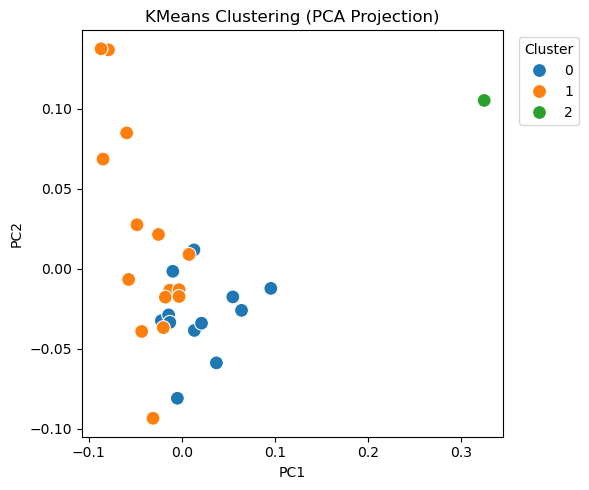

Agglomerative silhouette score: 0.404


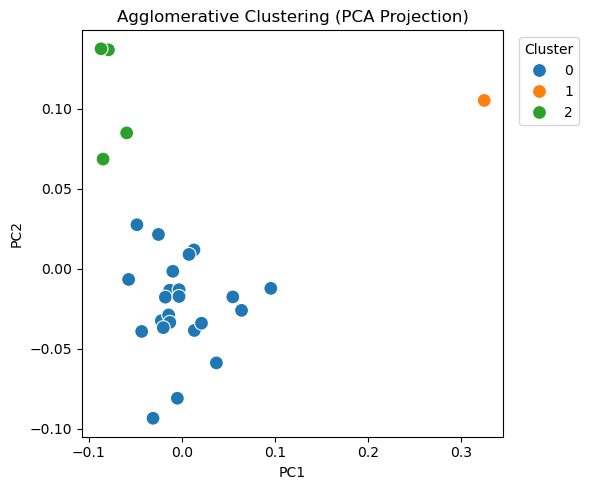

In [20]:
# 2) Define clustering algorithms
k = 3
methods = {
    'KMeans':            KMeans(n_clusters=k, random_state=42,),
    'Agglomerative':     AgglomerativeClustering(n_clusters=k, linkage='ward'),
}

# 3) Run clustering, plot
for name, algo in methods.items():
    labels = algo.fit_predict(imp_matrix)
    emb_df[name] = labels

    # Silhouette score
    unique_labels = set(labels)
    if len(unique_labels) > 1 and -1 not in unique_labels:
        score = silhouette_score(imp_matrix, labels)
        print(f"{name} silhouette score: {score:.3f}")
    else:
        print(f"{name} produced {len(unique_labels)} clusters (including noise).")

    # Scatterplot in PCA space
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        data=emb_df,
        x='PC1', y='PC2',
        hue=name,
        palette='tab10',
        s=100,
        legend='full'
    )
    plt.title(f"{name} Clustering (PCA Projection)")
    plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

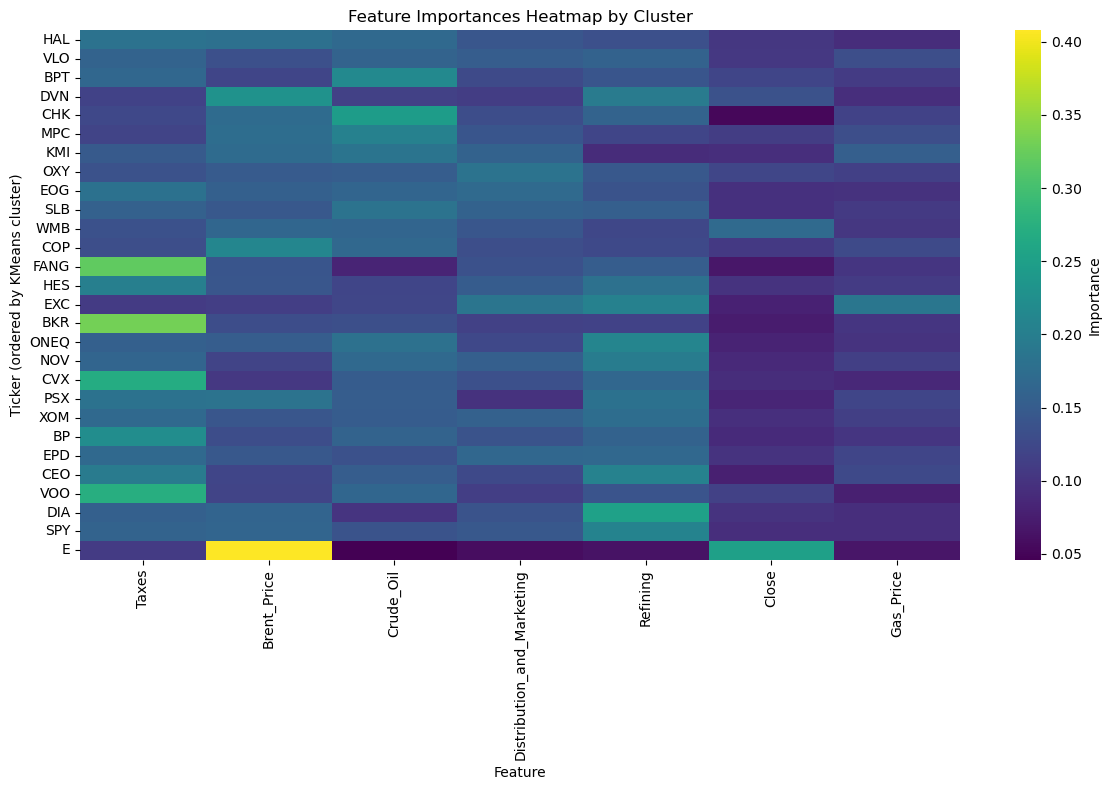

In [21]:
# 4) Heatmap of feature importances ordered by one cluster labeling
order = emb_df.sort_values('KMeans').index
plt.figure(figsize=(12,8))
sns.heatmap(
    imp_matrix.loc[order],
    cmap='viridis',
    cbar_kws={'label': 'Importance'},
    xticklabels=True,
    yticklabels=True
)
plt.xlabel("Feature")
plt.ylabel("Ticker (ordered by KMeans cluster)")
plt.title("Feature Importances Heatmap by Cluster")
plt.tight_layout()
plt.show()

In [22]:
for name in methods.keys():
    print(f"\n=== {name} cluster assignments ===")
    labels = emb_df[name]
    for cluster_label in sorted(labels.unique()):
        members = labels[labels == cluster_label].index.tolist()
        print(f"Cluster {cluster_label}: {members}")



=== KMeans cluster assignments ===
Cluster 0: ['HAL', 'BPT', 'VLO', 'OXY', 'KMI', 'CHK', 'MPC', 'DVN', 'COP', 'EOG', 'SLB', 'WMB']
Cluster 1: ['FANG', 'EXC', 'HES', 'BKR', 'CVX', 'PSX', 'NOV', 'EPD', 'BP', 'XOM', 'CEO', 'ONEQ', 'DIA', 'VOO', 'SPY']
Cluster 2: ['E']

=== Agglomerative cluster assignments ===
Cluster 0: ['HAL', 'EXC', 'HES', 'BPT', 'VLO', 'OXY', 'KMI', 'PSX', 'NOV', 'CHK', 'MPC', 'DVN', 'COP', 'EPD', 'BP', 'XOM', 'EOG', 'CEO', 'SLB', 'WMB', 'ONEQ', 'DIA', 'SPY']
Cluster 1: ['E']
Cluster 2: ['FANG', 'BKR', 'CVX', 'VOO']


In [24]:
merged = pd.merge(emb_df, types_df, on='Ticker_Symbol', how='left')
merged

,PC1,PC2,Ticker_Symbol,KMeans,Agglomerative,AssetType,Name,Description,Sector,Industry,chain
0,0.013108,0.011775,HAL,0,0,Common Stock,Halliburton Company,Halliburton Company is an American multination...,ENERGY & TRANSPORTATION,"OIL & GAS FIELD SERVICES, NEC",upstream
1,-0.078655,0.136837,FANG,1,2,Common Stock,"Diamondback Energy, Inc.","Diamondback Energy, Inc., an independent oil a...",ENERGY & TRANSPORTATION,OIL & GAS E&P,upstream
2,0.324600,0.105214,E,2,1,Common Stock,Eni S.p.A,Eni S.p.A. operates as an integrated energy co...,ENERGY & TRANSPORTATION,OIL & GAS INTEGRATED,integrated
3,-0.030827,-0.093467,EXC,1,0,Common Stock,Exelon Corporation,Exelon Corporation is an American Fortune 100 ...,ENERGY & TRANSPORTATION,ELECTRIC & OTHER SERVICES COMBINED,downstream
4,-0.024989,0.021415,HES,1,0,Common Stock,Hess Corporation,Hess Corporation (formerly Amerada Hess Corpor...,ENERGY & TRANSPORTATION,PETROLEUM REFINING,upstream
5,-0.086601,0.137491,BKR,1,2,Common Stock,Baker Hughes Company,Baker Hughes Company provides a portfolio of t...,ENERGY & TRANSPORTATION,OIL & GAS EQUIPMENT & SERVICES,upstream*
6,-0.021910,-0.032491,BPT,0,0,Common Stock,BP Prudhoe Bay Royalty Trust,BP Prudhoe Bay Royalty Trust is a grantor trus...,TECHNOLOGY,GENERAL,upstream
7,-0.014063,-0.028872,VLO,0,0,Common Stock,Valero Energy Corporation,Valero Energy Corporation is a Fortune 500 int...,ENERGY & TRANSPORTATION,PETROLEUM REFINING,downstream
8,-0.084448,0.068546,CVX,1,2,Common Stock,Chevron Corp,Chevron Corporation is an American multination...,ENERGY & TRANSPORTATION,PETROLEUM REFINING,integrated
9,0.013494,-0.038574,OXY,0,0,Common Stock,Occidental Petroleum Corporation,Occidental Petroleum Corporation is an America...,ENERGY & TRANSPORTATION,CRUDE PETROLEUM & NATURAL GAS,upstream


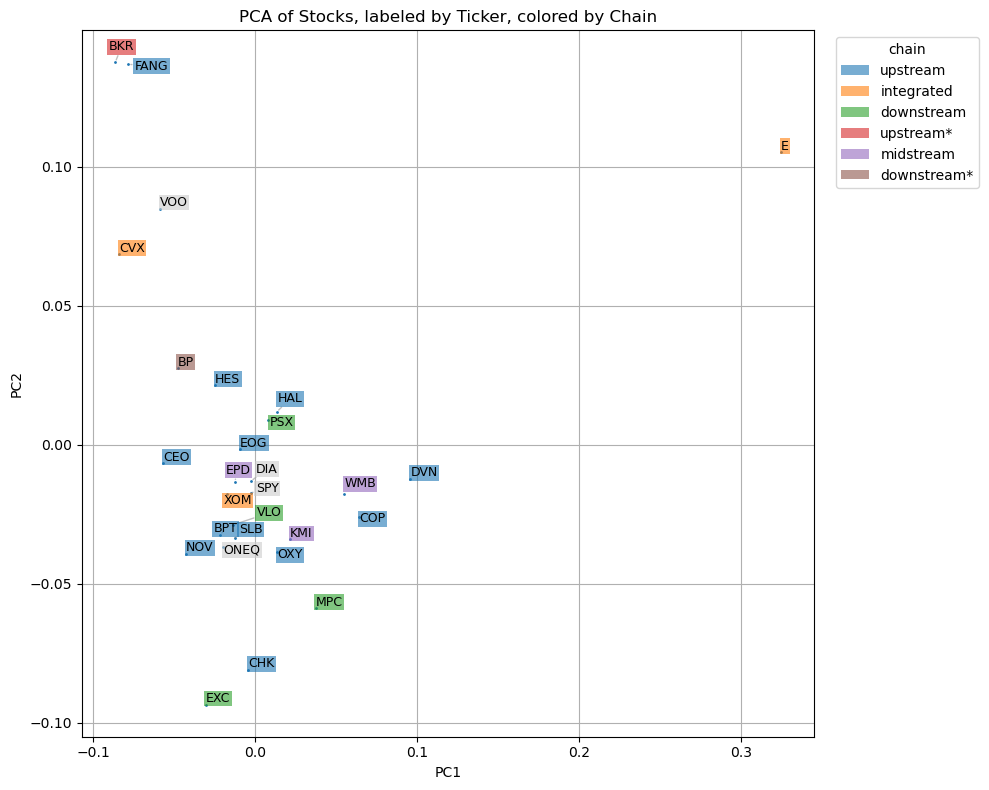

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# 1) Draw an invisible scatter to set the axis limits correctly:
ax.scatter(merged['PC1'], merged['PC2'], s=0, alpha=0)

# 2) Then draw your text labels at the true coordinates
texts = []
for _, row in merged.iterrows():
    c = palette.get(row['chain'], (0.8,0.8,0.8))
    txt = ax.text(row['PC1'], row['PC2'], row['Ticker_Symbol'],
                  fontsize=9, color='black',
                  bbox=dict(facecolor=c, alpha=0.6, pad=1, edgecolor='none'))
    texts.append(txt)

# … rest unchanged …
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA of Stocks, labeled by Ticker, colored by Chain')
ax.grid(True)

legend_handles = [
    Patch(facecolor=col, edgecolor='none', label=chain, alpha=0.6)
    for chain, col in palette.items()
]
ax.legend(handles=legend_handles, title='chain',
          bbox_to_anchor=(1.02,1), loc='upper left')

# nudge overlapping labels
adjust_text(texts, 
            only_move={'points':'y','texts':'y'},
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5),
            ax=ax)

plt.tight_layout()
plt.show()
